In [79]:
import numpy as np
import matplotlib.pylab as plt
import csv
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import math

import glob # Files with different names 

from matplotlib.colors import LogNorm 

np.float = float  # Redirect any 'np.float' usage to 'float'

def csv_to_matrix(file_path):
    # Load CSV data into a numpy matrix
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = np.array([list(map(float, row)) for row in reader])

    return data

plt.rc('font', family='serif')


# Array of 15 different colors with their names
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Olive
    "#17becf",  # Cyan
    "#f54242",  # Bright Red
    "#42f5b3",  # Mint Green
    "#f5e342",  # Yellow
    "#4287f5",  # Bright Blue
    "#9b59b6"   # Lavender
]
"""
# Array of 15 different line line_styles
line_styles = [
    "-",   # Solid
    "--",  # Dashed
    "-.",  # Dash-dot
    ":",   # Dotted
    (0, (5, 10)),  # Custom: Long Dash
    (0, (3, 5, 1, 5)),  # Custom: Dash-Dot-Dash
    (0, (1, 1)),  # Densely dotted
    (0, (5, 1)),  # Densely dashed
    (0, (3, 1, 1, 1)),  # Densely dash-dot
    (0, (3, 5, 1, 5, 1, 5)),  # Complex custom pattern
    (0, (8, 4, 2, 4)),  # Alternating long/short dash
    (0, (2, 2)),  # Very short dashes
    (0, (1, 4)),  # Dots with more spacing
    (0, (7, 2, 3, 2)),  # Dash-dot with different spacing
    (0, (6, 3))  # Medium dash
]
"""
line_styles = [
    "-",   # Solid
    "--",  # Dashed
    "-.",  # Dash-dot
    ":",   # Dotted
       "-",   # Solid
    "--",  # Dashed
    "-.",  # Dash-dot
    ":",   # Dotted
       "-",   # Solid
    "--",  # Dashed
    "-.",  # Dash-dot
    ":",   # Dotted
       "-",   # Solid
    "--",  # Dashed
    "-.",  # Dash-dot
    ":",   # Dotted
  
]

# Array of 15 different markers
markers = [
    "o",   # Circle
    "s",   # Square
    "D",   # Diamond
    "v",   # Triangle Down
    "^",   # Triangle Up
    "<",   # Triangle Left
    ">",   # Triangle Right
    "p",   # Pentagon
    "*",   # Star
    "h",   # Hexagon
    "H",   # Alternate Hexagon
    "x",   # X shape
    "+",   # Plus shape
    "|",   # Vertical line
    "_"    # Horizontal line
]


Sensitivity and bin number

./chi2_int_origin-cake_2025-02-20/numu_channel/chi2int_flv1_origin-cake_cth80-40-40_2025-02-20_161710.csv color: #1f77b4  style  -
./chi2_int_origin-cake_2025-02-20/numu_channel/chi2int_flv1_origin-cake_cth20-40-40_2025-02-20_161639.csv color: #ff7f0e  style  --
./chi2_int_origin-cake_2025-02-20/numu_channel/chi2int_flv1_origin-cake_cth40-40-40_2025-02-20_161659.csv color: #2ca02c  style  -.
./chi2_int_origin-cake_2025-02-20/numu_channel/chi2int_flv1_origin-cake_cth40-40-40_2025-02-20_160732.csv color: #d62728  style  :


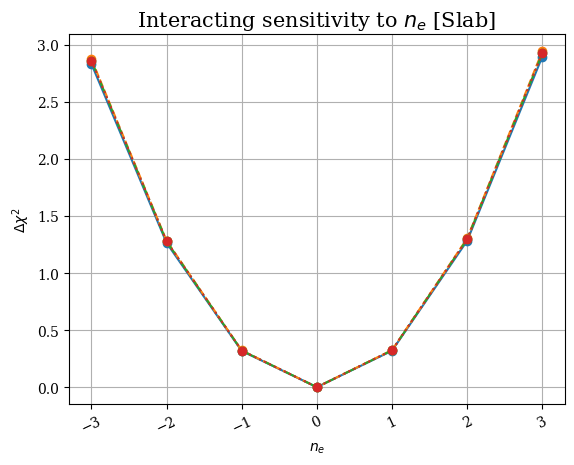

In [47]:
results_dir= "./chi2_int_origin-cake_2025-02-20/" # Directory of experiment results
channel_dir= results_dir+"numu_channel/"
#SimFiles = glob.glob(channel_dir+"*.csv")

labels = ["40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 # Purple

for SimFiles in SimFiles:
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] ,  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[:,2], senv_nu[:,4],color = colors[natt], linestyle = line_styles[natt],
         marker = 'o') 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Interacting sensitivity to $n_e$ [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

# Effect of bin size on sensitivity from reconstructed signal

## Bin size in the interacting space

In [112]:
results_dir= "./chi2_obs_origin-pancake__2025-02-22/" # Directory of experiment results
channel_dir= results_dir+"numu_channel/"
#SimFiles = glob.glob(channel_dir+"*.csv")

Coarse obs binning - Coarse int energy binnig - fixed zenith

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-40_2025-02-22_105020.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-40_2025-02-22_104614.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int160-40-40_2025-02-22_105039.csv color: #2ca02c  style  -.  marker D


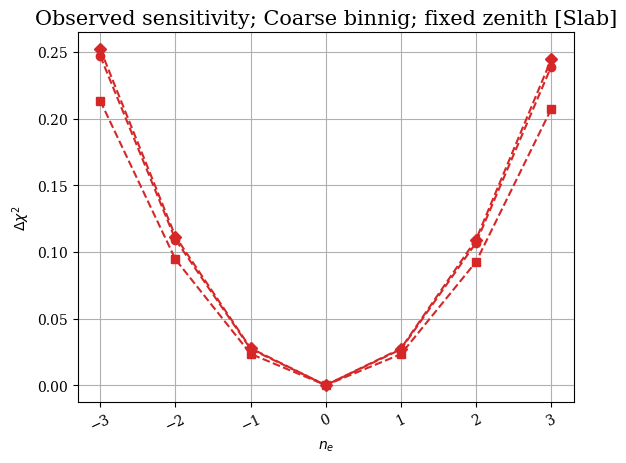

In [116]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"


labels = ["Obs5-40-5","-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed zenith [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-40_2025-02-22_105020.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-40_2025-02-22_104614.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int160-40-40_2025-02-22_105039.csv color: #2ca02c  style  -.  marker D


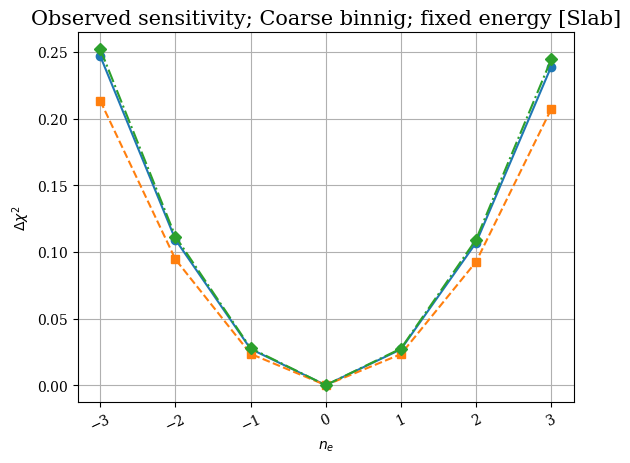

In [60]:

#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Obs5-40-5","40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed energy [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-40_2025-02-22_105020.csv color: #d62728  style  --  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-40_2025-02-22_104614.csv color: #d62728  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int160-40-40_2025-02-22_105039.csv color: #d62728  style  --  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-80_2025-02-22_104657.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-160_2025-02-22_104933.csv color: #1f77b4  style  -  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-40_2025-02-22_104614.csv color: #1f77b4  style  -  marker D


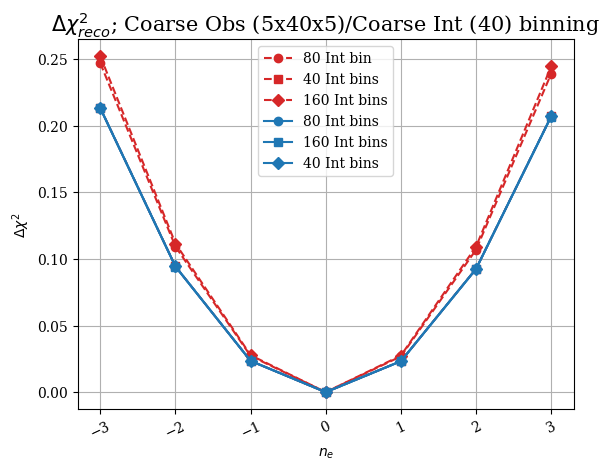

In [129]:
#Summary of plots

# Fixed Energy binning
labels = ["Obs5-40-5","-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

plabels = ["80 Int bin","40 Int bins","160 Int bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[3]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt],label=plabels[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

# Fixed Zenith Binning
labels = ["Obs5-40-5","Int40-40-"]  # Files must contain BOTH "chi2" AND "LLVP"
plabels = ["80 Int bins","160 Int bins","40 Int bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[0]," style ",line_styles[0] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[0],
         marker = markers[natt],label=plabels[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse Obs (5x40x5)/Coarse Int (40) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

Coarse obs binning - Coarse int binnig - fixed zenith

Coarse obs binning - fine int binnig - fixed zenith

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-40_2025-02-22_105020.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-80_2025-02-22_110818.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-160_2025-02-22_110846.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-20_2025-02-22_110731.csv color: #d62728  style  :  marker v


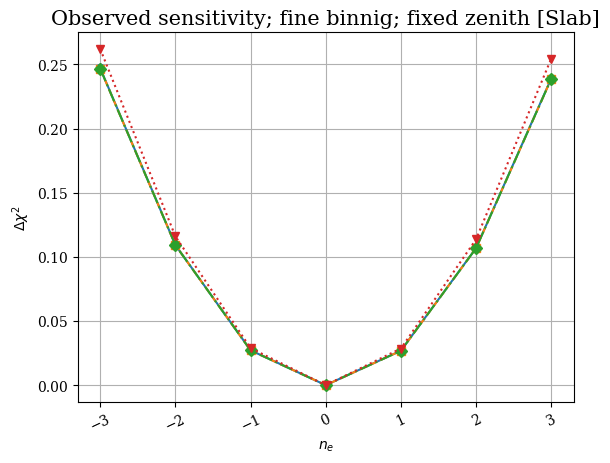

In [61]:

#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Int80-40-"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; fine binnig; fixed zenith [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

Coarse obs binning - fine int binnig - fixed energy

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-80_2025-02-22_110818.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int20-40-80_2025-02-22_112349.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-80_2025-02-22_104657.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int160-40-80_2025-02-22_112412.csv color: #d62728  style  :  marker v


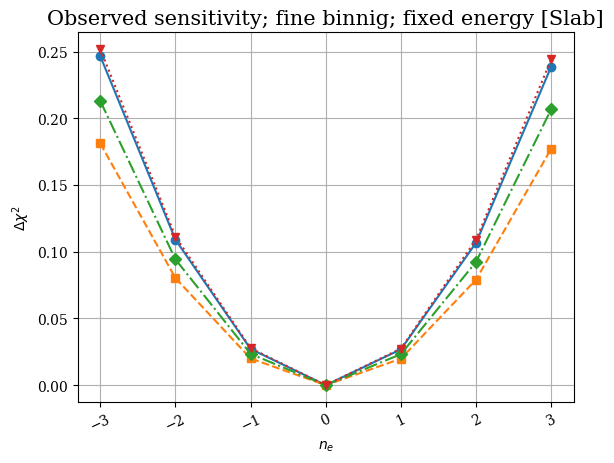

In [62]:

#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["40-80_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; fine binnig; fixed energy [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-80_2025-02-22_110818.csv color: #d62728  style  --  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int20-40-80_2025-02-22_112349.csv color: #d62728  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-80_2025-02-22_104657.csv color: #d62728  style  --  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int160-40-80_2025-02-22_112412.csv color: #d62728  style  --  marker v
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-40_2025-02-22_105020.csv color: blue #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int80-40-80_2025-02-22_110818.csv color: blue #1f77b4  style  -  marker s
./chi2_obs_origin-pancake__2025-02-22

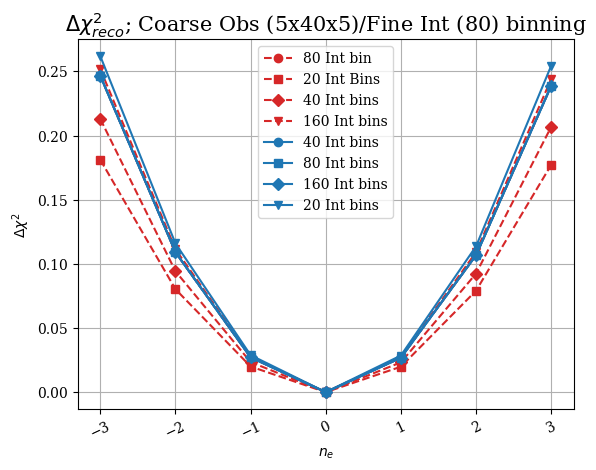

In [130]:
#Summary of plots

# Fixed Energy binning
labels = ["Obs5-40-5","-40-80_"]  # Files must contain BOTH "chi2" AND "LLVP"

plabels = ["80 Int bin","20 Int Bins","40 Int bins","160 Int bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[3]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt],label=plabels[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

# Fixed Zenith Binning
labels = ["Obs5-40-5","Int80-40-"]  # Files must contain BOTH "chi2" AND "LLVP"
plabels = ["40 Int bins","80 Int bins","160 Int bins","20 Int bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color: blue",colors[0]," style ",line_styles[0] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[0],
         marker = markers[natt],label=plabels[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse Obs (5x40x5)/Fine Int (80) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

## Bin size in the Observed space - Slab LLVP

coarse binning - fixed zenith

In [4]:
results_dir= "./chi2_obs_origin-pancake__2025-02-22/" # Directory of experiment results
channel_dir= results_dir+"numu_channel/"
#SimFiles = glob.glob(channel_dir+"*.csv")

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-15Int40-40-40_2025-02-22_140017.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-7Int40-40-40_2025-02-22_115028.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-11Int40-40-40_2025-02-22_115103.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-40_2025-02-22_104614.csv color: #d62728  style  :  marker v
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int40-40-40_2025-02-22_115015.csv color: #9467bd  style  -  marker ^


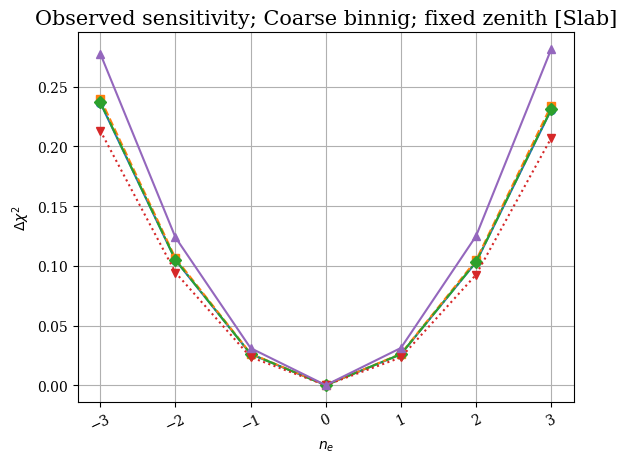

In [5]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Obs5-40","Int40-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed zenith [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

coarse binning - fixed energy

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-5Int40-40-40_2025-02-22_114831.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs7-40-5Int40-40-40_2025-02-22_114739.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs3-40-5Int40-40-40_2025-02-22_114721.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-40_2025-02-22_104614.csv color: #d62728  style  :  marker v
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs11-40-5Int40-40-40_2025-02-22_114754.csv color: #9467bd  style  -  marker ^


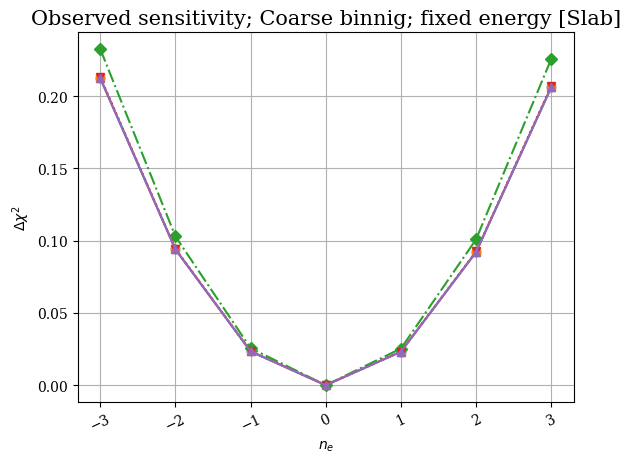

In [6]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["-40-5Int","40-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0 # Purple
for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed energy [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-5Int40-40-40_2025-02-22_114831.csv color: #d62728  style  --  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs7-40-5Int40-40-40_2025-02-22_114739.csv color: #d62728  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs3-40-5Int40-40-40_2025-02-22_114721.csv color: #d62728  style  --  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-5Int40-40-40_2025-02-22_104614.csv color: #d62728  style  --  marker v
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs11-40-5Int40-40-40_2025-02-22_114754.csv color: #d62728  style  --  marker ^
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-15Int40-40-40_2025-02-22_140017.csv color: blue #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/n

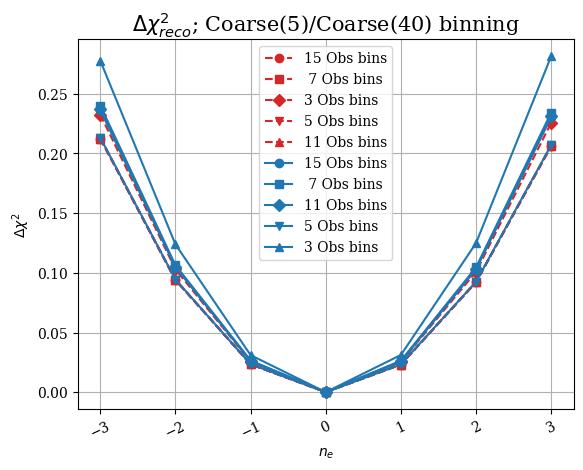

In [7]:
#Summary of plots

# Fixed Energy binning
labels = ["-40-5Int","40-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"
plabels = ["15 Obs bins"," 7 Obs bins","3 Obs bins","5 Obs bins","11 Obs bins"]


SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[3]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt],label=plabels[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

# Fixed Zenith Binning
labels = ["Obs5-40","Int40-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"
 # Files must contain BOTH "chi2" AND "LLVP"
plabels = ["15 Obs bins"," 7 Obs bins","11 Obs bins","5 Obs bins","3 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color: blue",colors[0]," style ",line_styles[0] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[0],
         marker = markers[natt],label=plabels[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse(5)/Coarse(40) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

medium binning - fixed zenith

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-15Int40-40-40_2025-02-22_140017.csv color: #d62728  style  --  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs3-40-15Int40-40-40_2025-02-22_141320.csv color: #d62728  style  --  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-15Int40-40-40_2025-02-22_140026.csv color: #d62728  style  --  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs25-40-15Int40-40-40_2025-02-22_140039.csv color: #d62728  style  --  marker v


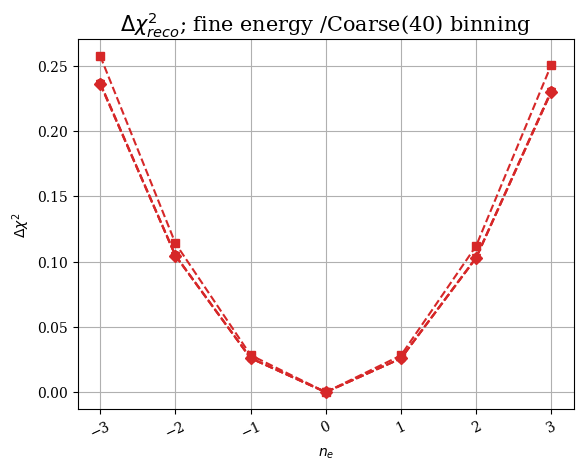

In [148]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["-40-15Int","40-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[3]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; fine energy /Coarse(40) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid()

./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-40Int40-40-40_2025-02-22_141404.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-5Int40-40-40_2025-02-22_114831.csv color: #1f77b4  style  -  marker s
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-17Int40-40-40_2025-02-22_121851.csv color: #1f77b4  style  -  marker D
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-15Int40-40-40_2025-02-22_140026.csv color: #1f77b4  style  -  marker v
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-7Int40-40-40_2025-02-22_115501.csv color: #1f77b4  style  -  marker ^
./chi2_obs_origin-pancake__2025-02-22/numu_channel/chi2obs_flv1_origin-pancake__Obs15-40-3Int40-40-40_2025-02-22_115446.csv color: #1f77b4  style  -  marker <
./chi2_obs_origin-pancake__2025-02-22/numu_

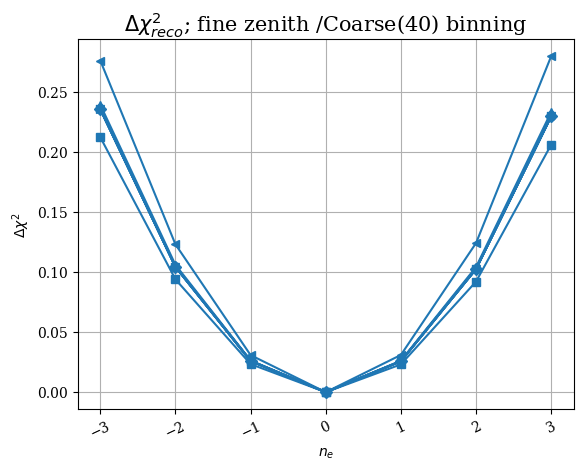

In [149]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Obs15-40","Int40-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[0]," style ",line_styles[0] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[0],
         marker = markers[natt]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; fine zenith /Coarse(40) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

# Effect of fine Interacting space - chi2 maximizing observed bin sizes

trade off between binnig in spaces

In [150]:
results_dir= "./chi2_obs_origin-pancake__2025-02-24/" # Directory of experiment results
channel_dir= results_dir+"numu_channel/"
#SimFiles = glob.glob(channel_dir+"*.csv")

./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int40-40-40_2025-02-24_141040.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-40_2025-02-24_141128.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int160-40-40_2025-02-24_141145.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake-th__Obs5-40-3Int80-40-40_2025-02-24_153156_binvar.csv color: #d62728  style  :  marker v
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-40_2025-02-24_151905.csv color: #9467bd  style  -  marker ^
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int40-40-160_2025-02-24_141111.csv color: #8c564b  style  --  marker <
./chi2_obs_origin-pancake__2025-02-24

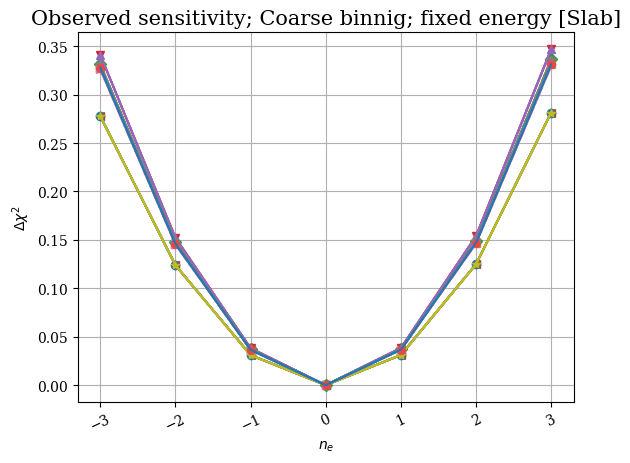

In [151]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["chi2obs"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed energy [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid()

No handles with labels found to put in legend.


./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int40-40-40_2025-02-24_141040.csv color: #2ca02c  style  --  marker o
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-40_2025-02-24_141128.csv color: #2ca02c  style  --  marker s
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int160-40-40_2025-02-24_141145.csv color: #2ca02c  style  --  marker D
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-40_2025-02-24_151905.csv color: #2ca02c  style  --  marker v
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int40-40-40_2025-02-24_141040.csv color: blue #1f77b4  style  --  marker o
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int40-40-160_2025-02-24_141111.csv color: blue #1f77b4  style  --  marker s
./chi2_obs_origin-pancake__2025-02

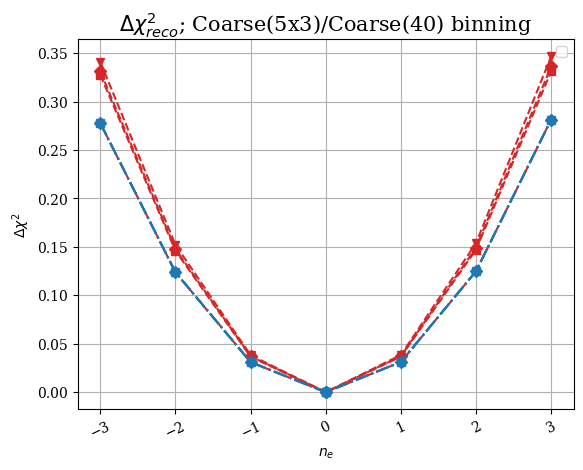

In [159]:
#Summary of plots

# Fixed Energy binning
labels = ["pancake__Obs5-40-3Int","-40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"

#plabels = ["15 Obs bins"," 7 Obs bins","11 Obs bins","5 Obs bins","3 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[2]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

# Fixed Zenith Binning
labels = ["pancake__Obs5-40-3","Int40-40-"]  # Files must contain BOTH "chi2" AND "LLVP"
 # Files must contain BOTH "chi2" AND "LLVP"
#plabels = ["15 Obs bins"," 7 Obs bins","3 Obs bins","5 Obs bins","11 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color: blue",colors[0]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[2],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse(5x3)/Coarse(40) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

No handles with labels found to put in legend.


./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int40-40-80_2025-02-24_141055.csv color: #2ca02c  style  --  marker o
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-80_2025-02-24_144637.csv color: #2ca02c  style  --  marker s
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-40_2025-02-24_141128.csv color: blue #1f77b4  style  --  marker o
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-40_2025-02-24_151905.csv color: blue #1f77b4  style  --  marker s
./chi2_obs_origin-pancake__2025-02-24/numu_channel/chi2obs_flv1_origin-pancake__Obs5-40-3Int80-40-80_2025-02-24_144637.csv color: blue #1f77b4  style  --  marker D


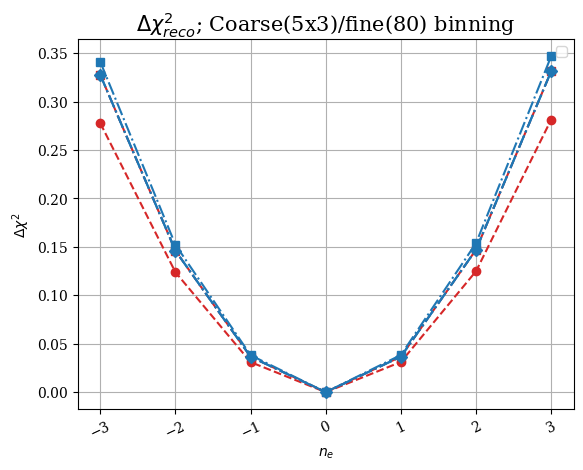

In [160]:
#Summary of plots

# Fixed Energy binning
labels = ["pancake__Obs5-40-3Int","-40-80_"]  # Files must contain BOTH "chi2" AND "LLVP"

#plabels = ["15 Obs bins"," 7 Obs bins","11 Obs bins","5 Obs bins","3 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[2]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

# Fixed Zenith Binning
labels = ["pancake__Obs5-40-3","Int80-40-"]  # Files must contain BOTH "chi2" AND "LLVP"
 # Files must contain BOTH "chi2" AND "LLVP"
#plabels = ["15 Obs bins"," 7 Obs bins","3 Obs bins","5 Obs bins","11 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color: blue",colors[0]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[2],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse(5x3)/fine(80) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

## Bin size in the Observed space - Layered LLVP

In [8]:
results_dir= "./chi2_obs_origin-cake-cth__2025-02-24/" # Directory of experiment results
channel_dir= results_dir+"numu_channel/"
#SimFiles = glob.glob(channel_dir+"*.csv")

./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs15-40-5Int40-40-40_2025-02-24_163348.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-3Int40-40-40_2025-02-24_164236.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-10Int40-40-40_2025-02-24_163405.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-15Int40-40-40_2025-02-24_163419.csv color: #d62728  style  :  marker v
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-5Int40-40-40_2025-02-24_163306.csv color: #9467bd  style  -  marker ^
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs10-40-5Int40-40-40_2025-02-24_163327.csv color: #8c564b  style  --  marker <
./chi2_obs_origin-cake-cth__2025-

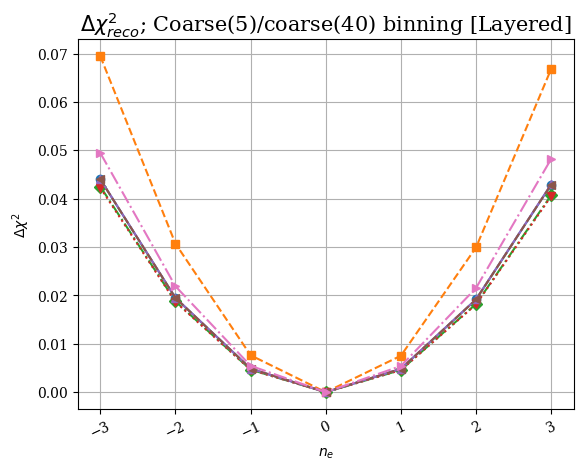

In [200]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Int40-40-40"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    #if senv_nu[0,4] > 0.06:
        plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
        print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse(5)/coarse(40) binning [Layered]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid()

./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs15-40-5Int40-40-40_2025-02-24_163348.csv color: #2ca02c  style  --  marker o
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-5Int40-40-40_2025-02-24_163306.csv color: #2ca02c  style  --  marker s
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-5Int40-40-80_2025-02-24_164320.csv color: #2ca02c  style  --  marker D
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs10-40-5Int40-40-40_2025-02-24_163327.csv color: #2ca02c  style  --  marker v
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-5Int80-40-40_2025-02-24_164304.csv color: #2ca02c  style  --  marker ^
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs3-40-5Int40-40-40_2025-02-24_164248.csv color: #2ca02c  style  --  marker <
./chi2_obs_origin-cake-cth__2025

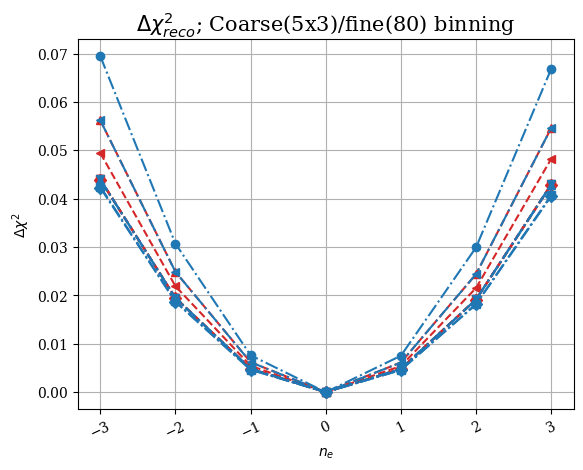

In [201]:
#Summary of plots

# Fixed Energy binning
labels = ["-40-5Int"]  # Files must contain BOTH "chi2" AND "LLVP"

#plabels = ["15 Obs bins"," 7 Obs bins","11 Obs bins","5 Obs bins","3 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[2]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

# Fixed Zenith Binning
labels = ["Obs5-40-"]  # Files must contain BOTH "chi2" AND "LLVP"
 # Files must contain BOTH "chi2" AND "LLVP"
#plabels = ["15 Obs bins"," 7 Obs bins","3 Obs bins","5 Obs bins","11 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color: blue",colors[0]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[2],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

#plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse(5x3)/fine(80) binning', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs20-40-3Int80-40-40_2025-02-24_165537.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs15-40-3Int80-40-40_2025-02-24_164346.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs25-40-3Int80-40-40_2025-02-24_165550.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-5Int80-40-40_2025-02-24_164304.csv color: #d62728  style  :  marker v


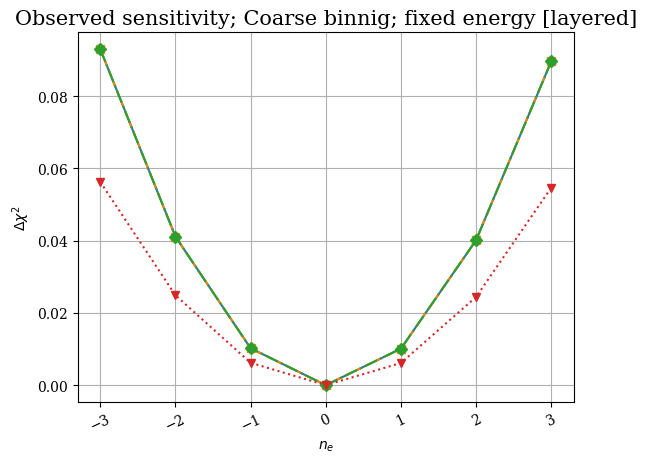

In [9]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Int80-40-40"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    #if senv_nu[0,4] > 0.06:
        plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
        print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed energy [layered]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid()

./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs15-40-3Int160-40-80_2025-02-24_165413.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs15-40-3Int80-40-40_2025-02-24_164346.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs15-40-3Int160-40-40_2025-02-24_165356.csv color: #2ca02c  style  -.  marker D


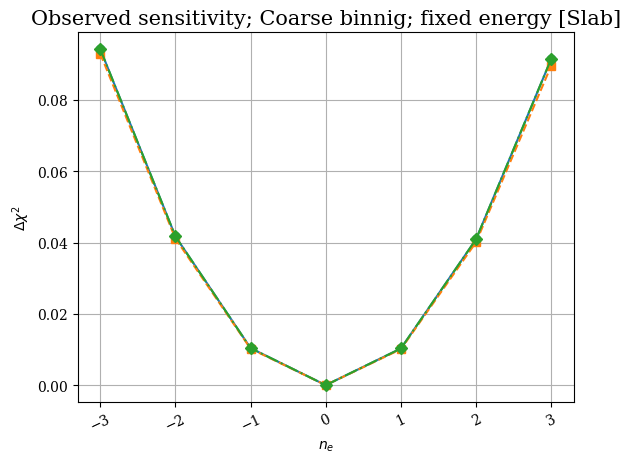

In [203]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Obs15-40-3"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    #if senv_nu[0,4] > 0.06:
        plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
        print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed energy [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid()

./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs15-40-5Int40-40-40_2025-02-24_163348.csv color: #1f77b4  style  -  marker o
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-3Int40-40-40_2025-02-24_164236.csv color: #ff7f0e  style  --  marker s
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-10Int40-40-40_2025-02-24_163405.csv color: #2ca02c  style  -.  marker D
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-15Int40-40-40_2025-02-24_163419.csv color: #d62728  style  :  marker v
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs5-40-5Int40-40-40_2025-02-24_163306.csv color: #9467bd  style  -  marker ^
./chi2_obs_origin-cake-cth__2025-02-24/numu_channel/chi2obs_flv1_origin-cake-cth__Obs10-40-5Int40-40-40_2025-02-24_163327.csv color: #8c564b  style  --  marker <
./chi2_obs_origin-cake-cth__2025-

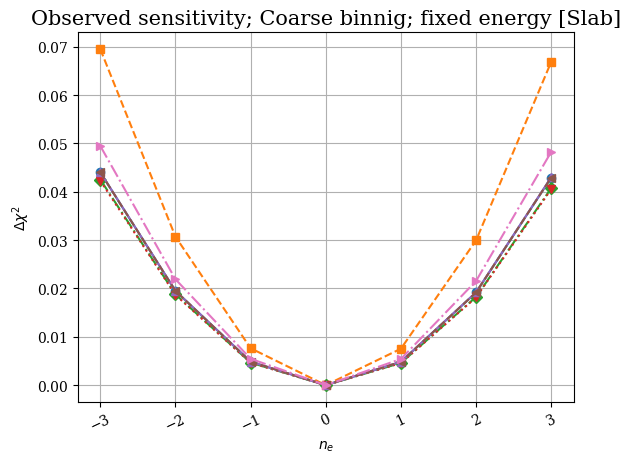

In [204]:
#labels = ["Int80-40-80"]  # Files must contain BOTH "chi2" AND "LLVP"
labels = ["Int40-40-40"]  # Files must contain BOTH "chi2" AND "LLVP"

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]


natt = 0 # Purple

for SimFiles in SimFiles:
    #print(SimFiles)
    
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    #if senv_nu[0,4] > 0.06:
        plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
        print(SimFiles + " color:",colors[natt]," style ",line_styles[natt] , " marker", markers[natt],  end="\n")
    natt = natt+1

plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'Observed sensitivity; Coarse binnig; fixed energy [Slab]', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid()

In [207]:
results_dir= "./chi2_obs_origin-cake-th__2025-02-26/" # Directory of experiment results
channel_dir= results_dir+"numu_channel/"
#SimFiles = glob.glob(channel_dir+"*.csv")

No handles with labels found to put in legend.


./chi2_obs_origin-cake-th__2025-02-26/numu_channel/chi2obs_flv1_origin-cake-th__Obs5-40-3Int40-40-160_2025-02-26_143731.csv color: #2ca02c  style  --  marker o
./chi2_obs_origin-cake-th__2025-02-26/numu_channel/chi2obs_flv1_origin-cake-th__Obs5-40-3Int40-40-80_2025-02-26_143650.csv color: #2ca02c  style  --  marker s
./chi2_obs_origin-cake-th__2025-02-26/numu_channel/chi2obs_flv1_origin-cake-th__Obs5-40-3Int160-40-40_2025-02-26_143714.csv color: blue #1f77b4  style  --  marker o
./chi2_obs_origin-cake-th__2025-02-26/numu_channel/chi2obs_flv1_origin-cake-th__Obs5-40-3Int80-40-40_2025-02-26_143636.csv color: blue #1f77b4  style  --  marker s


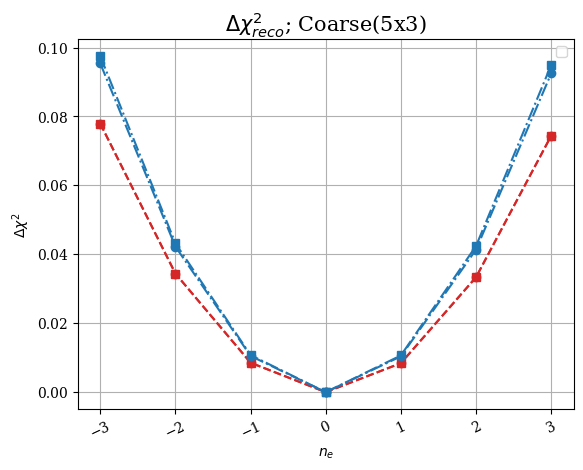

In [208]:
#Summary of plots

# Fixed Energy binning
labels = ["Int40-40-"]  # Files must contain BOTH "chi2" AND "LLVP"

#plabels = ["15 Obs bins"," 7 Obs bins","11 Obs bins","5 Obs bins","3 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[2]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[1],
         marker = markers[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

# Fixed Zenith Binning
labels = ["40-40_"]  # Files must contain BOTH "chi2" AND "LLVP"
 # Files must contain BOTH "chi2" AND "LLVP"
#plabels = ["15 Obs bins"," 7 Obs bins","3 Obs bins","5 Obs bins","11 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]
natt = 0

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color: blue",colors[0]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[2],
         marker = markers[natt]) 
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse(5x3)', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

In [11]:
results_dir= "./chi2_obs_origin-cake-th_BinSizeth_2025-03-04/" # Directory of experiment results
channel_dir= results_dir+"numu_channel/"
#SimFiles = glob.glob(channel_dir+"*.csv")

No handles with labels found to put in legend.


./chi2_obs_origin-cake-cth_BinSizeth_2025-03-04/numu_channel/chi2obs_flv1_origin-cake-cth_BinSizeth_Obs10-40-11Int160-40-80_2025-03-04_200600.csv color: #2ca02c  style  --  marker o
./chi2_obs_origin-cake-cth_BinSizeth_2025-03-04/numu_channel/chi2obs_flv1_origin-cake-cth_BinSizeth_Obs5-40-11Int160-40-80_2025-03-04_200548.csv color: #2ca02c  style  --  marker s
./chi2_obs_origin-cake-cth_BinSizeth_2025-03-04/numu_channel/chi2obs_flv1_origin-cake-cth_BinSizeth_Obs15-40-11Int160-40-80_2025-03-04_200611.csv color: #2ca02c  style  --  marker D
./chi2_obs_origin-cake-cth_BinSizeth_2025-03-04/numu_channel/chi2obs_flv1_origin-cake-cth_BinSizeth_Obs25-40-11Int160-40-80_2025-03-04_200632.csv color: #2ca02c  style  --  marker v
./chi2_obs_origin-cake-cth_BinSizeth_2025-03-04/numu_channel/chi2obs_flv1_origin-cake-cth_BinSizeth_Obs30-40-11Int160-40-80_2025-03-04_200644.csv color: #2ca02c  style  --  marker ^
./chi2_obs_origin-cake-cth_BinSizeth_2025-03-04/numu_channel/chi2obs_flv1_origin-cake-cth_B

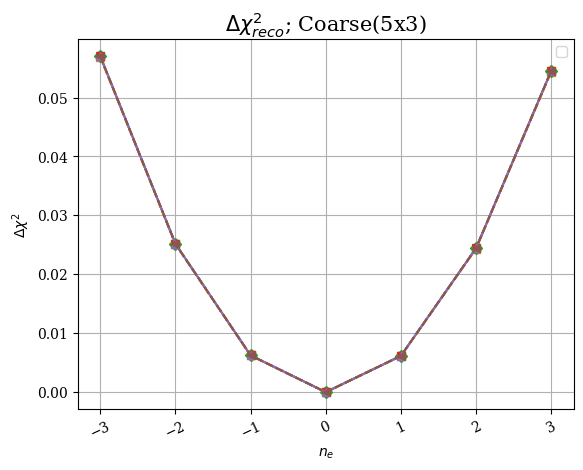

In [10]:
#Summary of plots

# Fixed Energy binning
labels = ["chi2obs"]  # Files must contain BOTH "chi2" AND "LLVP"

#plabels = ["15 Obs bins"," 7 Obs bins","11 Obs bins","5 Obs bins","3 Obs bins"]

SimFiles = [f for f in glob.glob(f"{channel_dir}/*.csv") if all(key in f for key in labels)]

natt = 0 

for SimFiles in SimFiles:
    #print(SimFiles)
    print(SimFiles + " color:",colors[2]," style ",line_styles[1] , " marker", markers[natt],  end="\n")
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    plt.plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[natt], linestyle = line_styles[natt],
         marker = markers[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1



plt.legend()
plt.xticks(rotation = 25) 
plt.xlabel(r'$n_e$') 
plt.ylabel(r'$\Delta \chi^2$') 
plt.title(r'$\Delta \chi^2_{reco}$; Coarse(5x3)', fontsize = 15) 
#plt.legend(["100 Mton-year","300 Mton-year","500 Mton-year"])
plt.grid() 

# Summary of the effect of bin size in observed events

### Binning in Energy (Evenly spaced, Variable, Logarithmic)

Evenly space binnig - Remarks

Text(0.5, 0.98, 'Effect of bin size $\\Delta E^{reco}$ on sensitivity')

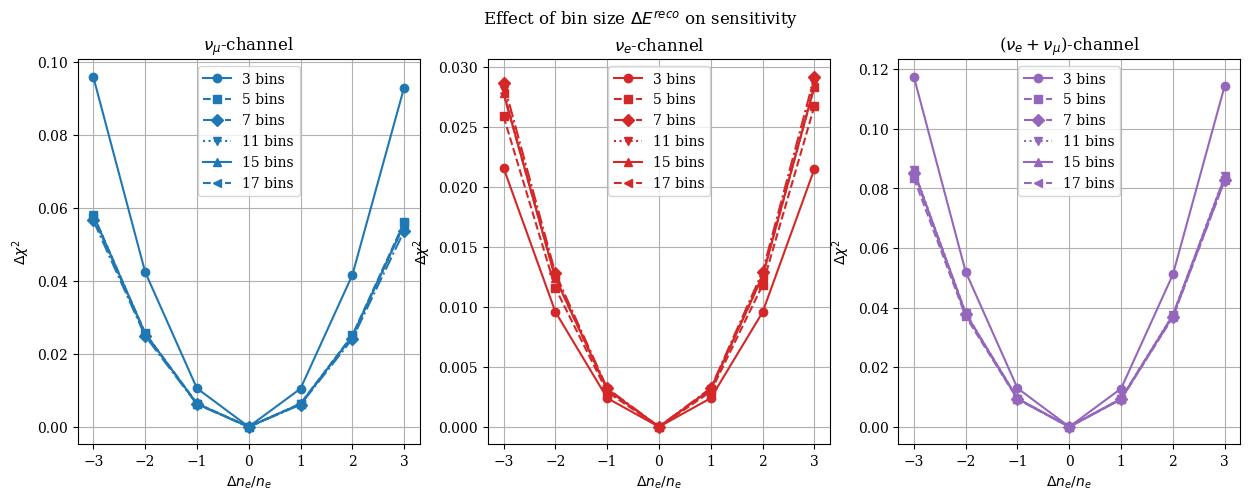

In [75]:
#File Directory

results_dir= "./chi2_obs_origin-cake-th_BinSizeEne_2025-03-04/" # Directory of experiment results
muchannel_dir= results_dir+"numu_channel/"
echannel_dir= results_dir+"nue_channel/"

Binlabels = ["3 bins","5 bins","7 bins","11 bins","15 bins","17 bins"]
#Summary of plots

# Fixed Energy binning
labels = ["chi2obs"]  # Files must contain BOTH "chi2" AND "LLVP"

#Blue(#1f77b4; natt = 0) - Muon channel
#Red(#d62728;  natt = 3)  - Electron channel
#Green(#9467bd;natt = 4) - Joint channel


figure, axis = plt.subplots(1, 3, figsize=(15, 5))  # 15x5 inches for a standard size

#Muon
SimFilesNumu = natsorted([f for f in glob.glob(f"{muchannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[0].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[natt],
         marker = markers[natt], label=Binlabels[natt])  
    natt = natt+1

#Electron
SimFilesNue = natsorted([f for f in glob.glob(f"{echannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNue:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[1].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[natt],
         marker = markers[natt], label=Binlabels[natt])
    natt = natt+1
    
# Joint signal
natt = 0 
for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_numu = np.array([list(map(float, row)) for row in reader])
    
    with open(SimFilesNue[natt], "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nue = np.array([list(map(float, row)) for row in reader])
    
    axis[2].plot(senv_nu[0:7,2], senv_numu[0:7,4]+senv_nue[0:7,4],color = colors[4], linestyle = line_styles[natt],
         marker = markers[natt],label=Binlabels[natt])
    natt = natt+1


#Labels
axis[0].set_title(r'$\nu_\mu$-channel')
axis[0].set_xlabel(r'$\Delta n_e/ n_e$')
axis[0].set_ylabel(r'$\Delta \chi^2$') 
axis[0].legend()
axis[0].grid()

axis[1].set_title(r'$\nu_e$-channel')
axis[1].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[1].set_ylabel(r'$\Delta \chi^2$') 
axis[1].legend()
axis[1].grid()

axis[2].set_title(r'($\nu_e + \nu_\mu$)-channel')
axis[2].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[2].set_ylabel(r'$\Delta \chi^2$') 
axis[2].legend()
axis[2].grid()

#Overall title
figure.suptitle("Effect of bin size $\Delta E^{reco}$ on sensitivity")

Variable size binnig - Remarks

Text(0.5, 0.98, 'Effect of varibale bin size ($\\Delta E^{reco} = \\sigma_E$) on sensitivity')

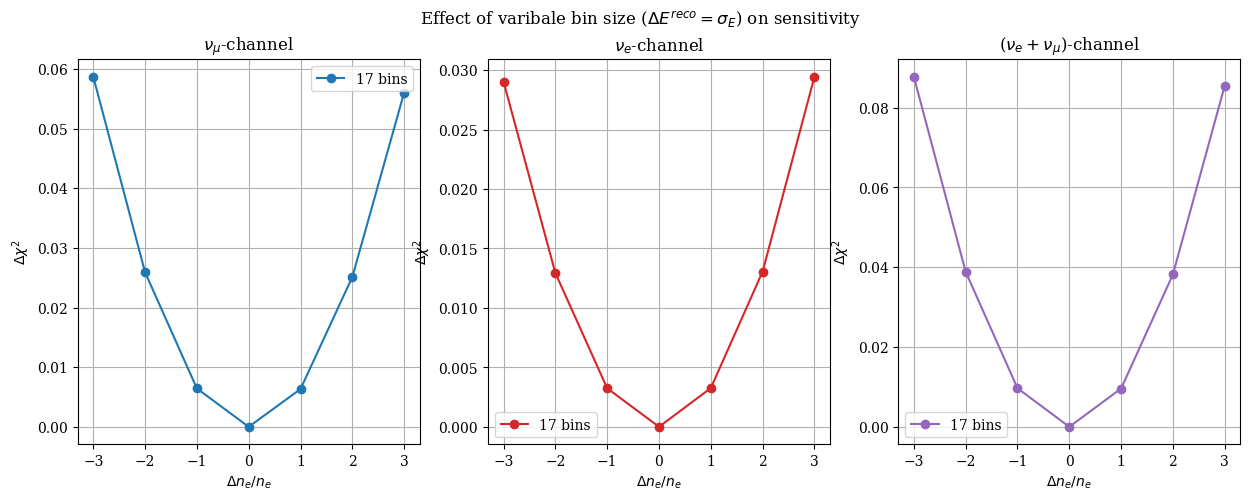

In [76]:
#File Directory

results_dir= "./chi2_obs_origin-cake-thvb_BinSizeEne_2025-03-03/" # Directory of experiment results
muchannel_dir= results_dir+"numu_channel/"
echannel_dir= results_dir+"nue_channel/"

Binlabels = ["17 bins"]

#Summary of plots

# Fixed Energy binning
labels = ["chi2obs"]  # Files must contain BOTH "chi2" AND "LLVP"

#Blue(#1f77b4; natt = 0) - Muon channel
#Red(#d62728;  natt = 3)  - Electron channel
#Green(#9467bd;natt = 4) - Joint channel


figure, axis = plt.subplots(1, 3, figsize=(15, 5))  # 15x5 inches for a standard size

#Muon
SimFilesNumu = natsorted([f for f in glob.glob(f"{muchannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[0].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[natt],
         marker = markers[natt], label = Binlabels[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1

#Electron
SimFilesNue = natsorted([f for f in glob.glob(f"{echannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNue:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[1].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[natt],
         marker = markers[natt], label = Binlabels[natt])
    
    #plt.plot(senv_nu[0:7,2], senv_nu[0:7,4]) 
    natt = natt+1
    
# Joint signal
natt = 0 
for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_numu = np.array([list(map(float, row)) for row in reader])
    
    with open(SimFilesNue[natt], "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nue = np.array([list(map(float, row)) for row in reader])
    
    axis[2].plot(senv_nu[0:7,2], senv_numu[0:7,4]+senv_nue[0:7,4],color = colors[4], linestyle = line_styles[natt],
         marker = markers[natt], label = Binlabels[natt])
    natt = natt+1


#Labels
axis[0].set_title(r'$\nu_\mu$-channel')
axis[0].set_xlabel(r'$\Delta n_e/ n_e$')
axis[0].set_ylabel(r'$\Delta \chi^2$') 
axis[0].legend()
axis[0].grid()

axis[1].set_title(r'$\nu_e$-channel')
axis[1].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[1].set_ylabel(r'$\Delta \chi^2$') 
axis[1].legend()
axis[1].grid()

axis[2].set_title(r'($\nu_e + \nu_\mu$)-channel')
axis[2].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[2].set_ylabel(r'$\Delta \chi^2$') 
axis[2].legend()
axis[2].grid()

#Overall title
figure.suptitle("Effect of varibale bin size ($\Delta E^{reco} = \sigma_E$) on sensitivity")

## Binning in zenith/cos

Evenly spaced binning in theta
I fixed 11 bins in energy - This number of energy bins show stability of the results

Text(0.5, 0.98, 'Effect of bin size $\\Delta \theta_Z^{reco}$ on sensitivity')

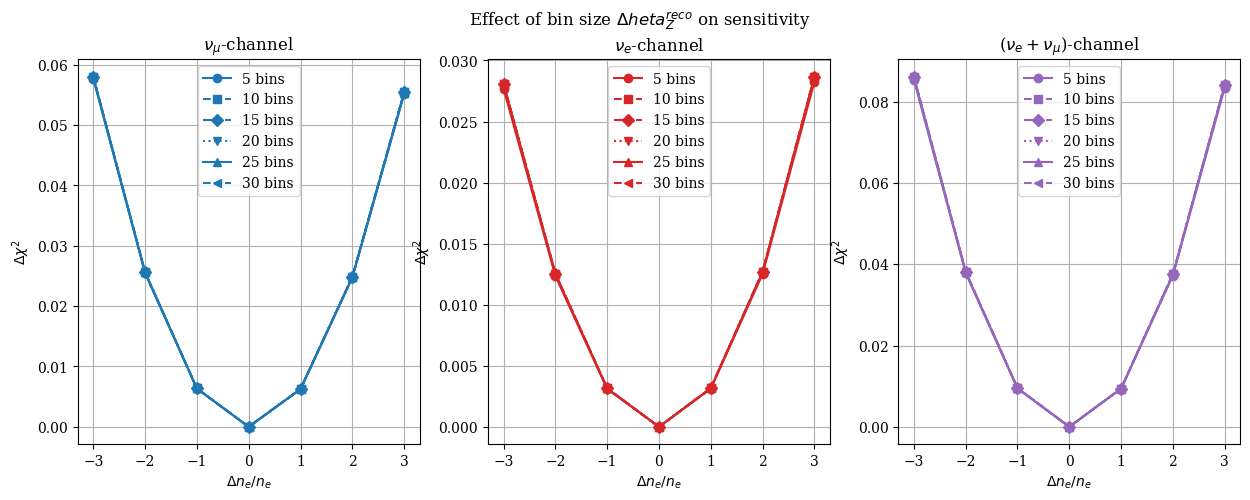

In [77]:
#File Directory

results_dir= "./chi2_obs_origin-cake-th_BinSizeth_2025-03-04/" # Directory of experiment results
muchannel_dir= results_dir+"numu_channel/"
echannel_dir= results_dir+"nue_channel/"

Binlabels = ["5 bins","10 bins","15 bins","20 bins","25 bins","30 bins"]

#Summary of plots

# Fixed Energy binning
labels = ["chi2obs"]  # Files must contain BOTH "chi2" AND "LLVP"

#Blue(#1f77b4; natt = 0) - Muon channel
#Red(#d62728;  natt = 3)  - Electron channel
#Green(#9467bd;natt = 4) - Joint channel


figure, axis = plt.subplots(1, 3, figsize=(15, 5))  # 15x5 inches for a standard size

#Muon
SimFilesNumu = natsorted([f for f in glob.glob(f"{muchannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[0].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[natt],
         marker = markers[natt], label=Binlabels[natt])
    natt = natt+1

#Electron
SimFilesNue = natsorted([f for f in glob.glob(f"{echannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNue:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[1].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[natt],
         marker = markers[natt],label=Binlabels[natt])
    natt = natt+1
    
# Joint signal
natt = 0 
for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_numu = np.array([list(map(float, row)) for row in reader])
    
    with open(SimFilesNue[natt], "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nue = np.array([list(map(float, row)) for row in reader])
    
    axis[2].plot(senv_nu[0:7,2], senv_numu[0:7,4]+senv_nue[0:7,4],color = colors[4], linestyle = line_styles[natt],
         marker = markers[natt],label=Binlabels[natt])
    natt = natt+1


#Labels
axis[0].set_title(r'$\nu_\mu$-channel')
axis[0].set_xlabel(r'$\Delta n_e/ n_e$')
axis[0].set_ylabel(r'$\Delta \chi^2$') 
axis[0].legend()
axis[0].grid()

axis[1].set_title(r'$\nu_e$-channel')
axis[1].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[1].set_ylabel(r'$\Delta \chi^2$') 
axis[1].legend()
axis[1].grid()

axis[2].set_title(r'($\nu_e + \nu_\mu$)-channel')
axis[2].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[2].set_ylabel(r'$\Delta \chi^2$') 
axis[2].legend()
axis[2].grid()

#Overall title
figure.suptitle("Effect of bin size $\Delta \theta_Z^{reco}$ on sensitivity")


Evenly space binning in cos(zenith)
It is showing a slighly worst performace compared to binning in zenith

Text(0.5, 0.98, 'Effect of bin size $\\Delta cos(\theta)^{reco}$ on sensitivity')

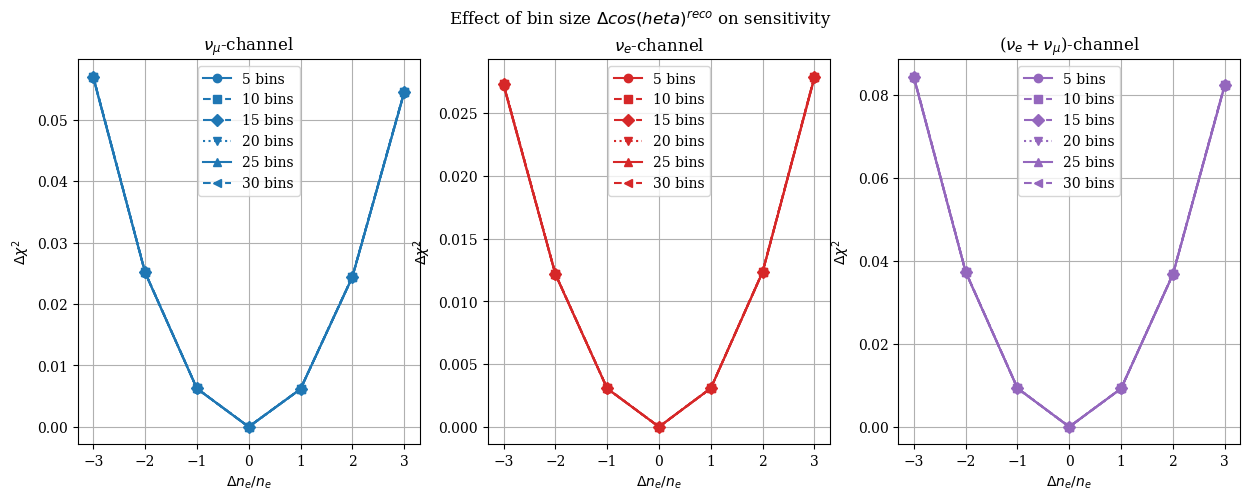

In [78]:
#File Directory

results_dir= "./chi2_obs_origin-cake-cth_BinSizeth_2025-03-04/" # Directory of experiment results
muchannel_dir= results_dir+"numu_channel/"
echannel_dir= results_dir+"nue_channel/"

Binlabels = ["5 bins","10 bins","15 bins","20 bins","25 bins","30 bins"]

#Summary of plots

# Fixed Energy binning
labels = ["chi2obs"]  # Files must contain BOTH "chi2" AND "LLVP"

#Blue(#1f77b4; natt = 0) - Muon channel
#Red(#d62728;  natt = 3)  - Electron channel
#Green(#9467bd;natt = 4) - Joint channel


figure, axis = plt.subplots(1, 3, figsize=(15, 5))  # 15x5 inches for a standard size

#Muon
SimFilesNumu = natsorted([f for f in glob.glob(f"{muchannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[0].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[0], linestyle = line_styles[natt],
         marker = markers[natt], label=Binlabels[natt])
    natt = natt+1

#Electron
SimFilesNue = natsorted([f for f in glob.glob(f"{echannel_dir}/*.csv") if all(key in f for key in labels)])
natt = 0 

for SimFiles in SimFilesNue:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nu = np.array([list(map(float, row)) for row in reader])
    
    axis[1].plot(senv_nu[0:7,2], senv_nu[0:7,4],color = colors[3], linestyle = line_styles[natt],
         marker = markers[natt],label=Binlabels[natt])
    natt = natt+1
    
# Joint signal
natt = 0 
for SimFiles in SimFilesNumu:
    with open(SimFiles, "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_numu = np.array([list(map(float, row)) for row in reader])
    
    with open(SimFilesNue[natt], "r") as binsfile:
        reader = csv.reader(binsfile)
        senv_nue = np.array([list(map(float, row)) for row in reader])
    
    axis[2].plot(senv_nu[0:7,2], senv_numu[0:7,4]+senv_nue[0:7,4],color = colors[4], linestyle = line_styles[natt],
         marker = markers[natt],label=Binlabels[natt])
    natt = natt+1


#Labels
axis[0].set_title(r'$\nu_\mu$-channel')
axis[0].set_xlabel(r'$\Delta n_e/ n_e$')
axis[0].set_ylabel(r'$\Delta \chi^2$') 
axis[0].legend()
axis[0].grid()

axis[1].set_title(r'$\nu_e$-channel')
axis[1].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[1].set_ylabel(r'$\Delta \chi^2$') 
axis[1].legend()
axis[1].grid()

axis[2].set_title(r'($\nu_e + \nu_\mu$)-channel')
axis[2].set_xlabel(r'$\Delta n_e/ n_e$') 
axis[2].set_ylabel(r'$\Delta \chi^2$') 
axis[2].legend()
axis[2].grid()

#Overall title
figure.suptitle("Effect of bin size $\Delta cos(\theta)^{reco}$ on sensitivity")